# Image classification using CNNs - filming

## Problem statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [52]:
X_train.shape

(50000, 32, 32, 3)

In [53]:
X_test.shape

(10000, 32, 32, 3)

# STEP #2: VISUALIZE DATA

[8]


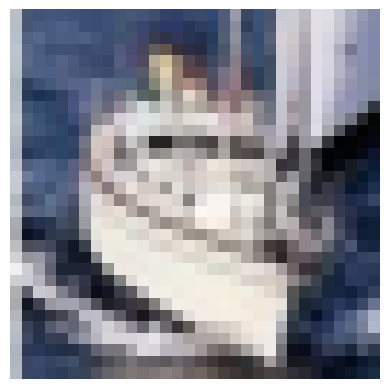

In [54]:
i = 44362
plt.imshow(X_train[i])
plt.axis('off')
print(y_train[i])

C:\Users\prana\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


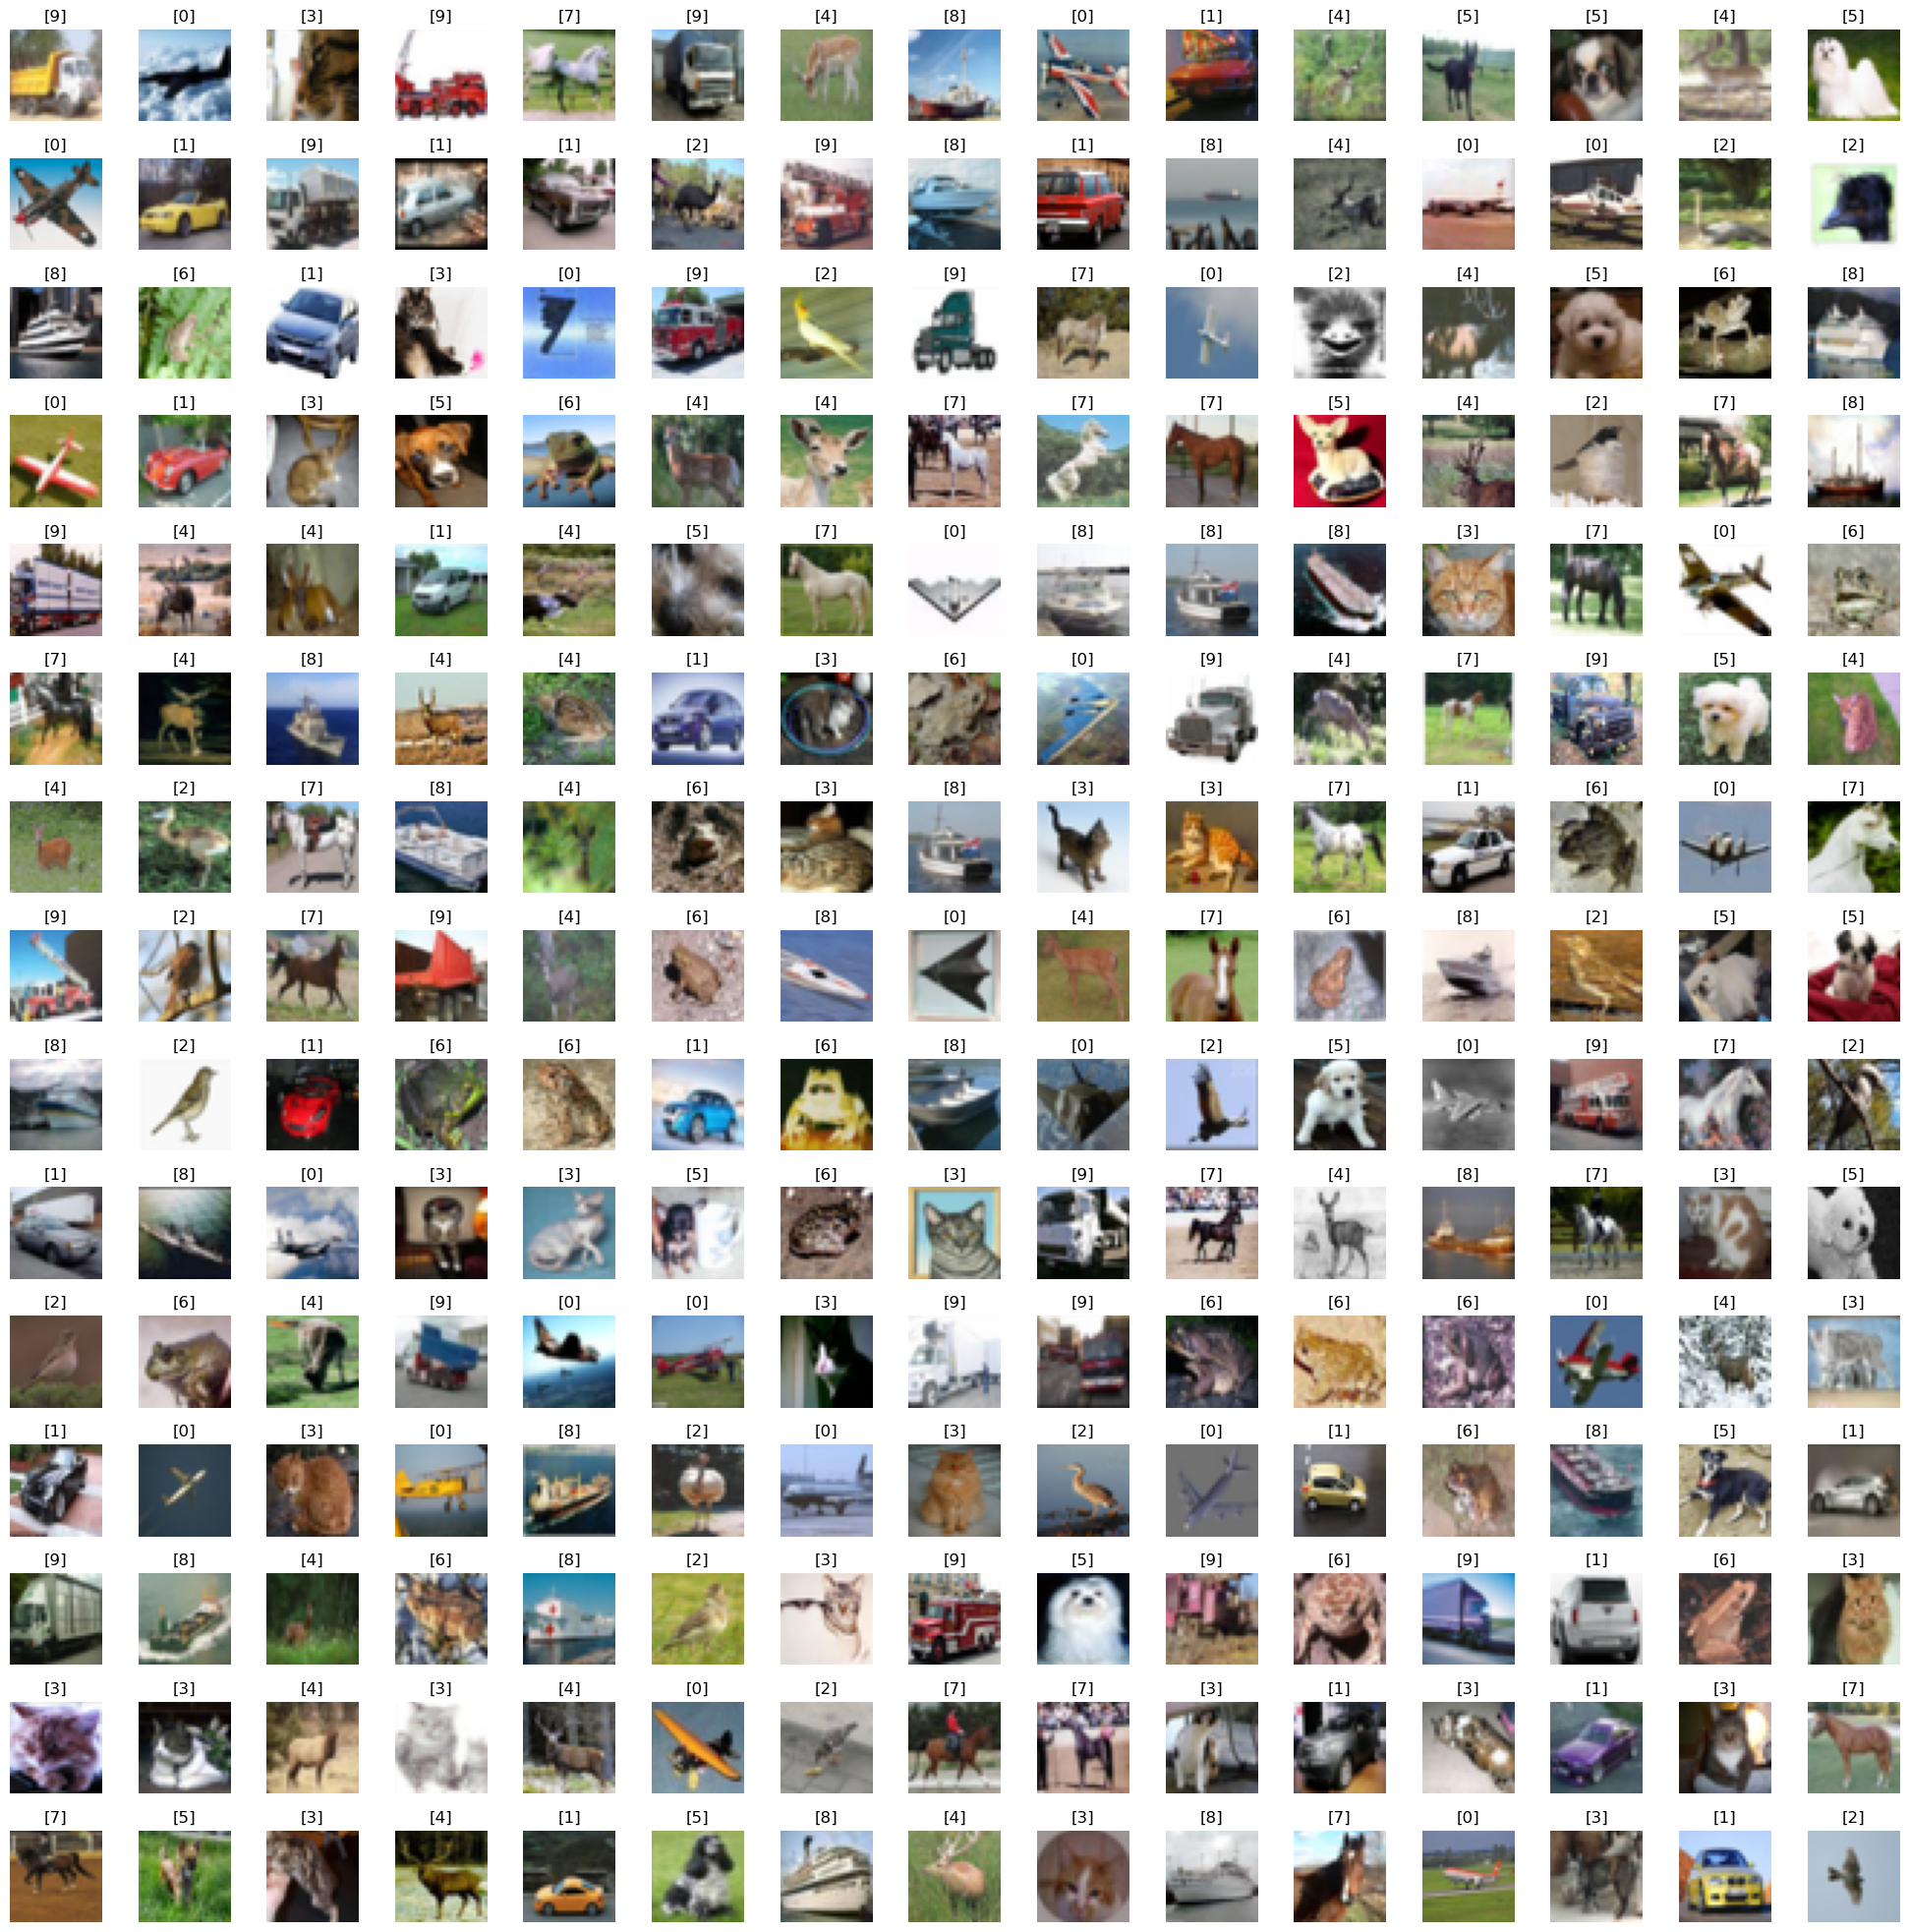

In [55]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid*W_grid):
    index  = np.random.randint(0, n_training)   # Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# STEP #3: DATA PREPARATION

In [56]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [57]:
number_cat = 10

In [58]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [59]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [60]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [62]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [63]:
X_train = X_train/255
X_test = X_test/255

In [64]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [65]:
X_train.shape

(50000, 32, 32, 3)

In [66]:
Input_shape = X_train.shape[1:]

In [67]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [68]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [69]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation ='relu'))
cnn_model.add(Dense(units = 512, activation ='relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [70]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [71]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5929 - accuracy: 0.4241
Epoch 2/2
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1393 - accuracy: 0.6003


# STEP #5: EVALUATE THE MODEL

In [72]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy: {}".format(evaluation[1]))

313/313 [==============================] - 3s 9ms/step - loss: 1.1482 - accuracy: 0.6217
Test Accuracy: 0.6216999888420105


In [73]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes = predicted_classes.argmax(1)
predicted_classes

313/313 [==============================] - 3s 8ms/step


array([3, 8, 1, ..., 5, 4, 7], dtype=int64)

In [74]:
y_test = y_test.argmax(1)

In [75]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

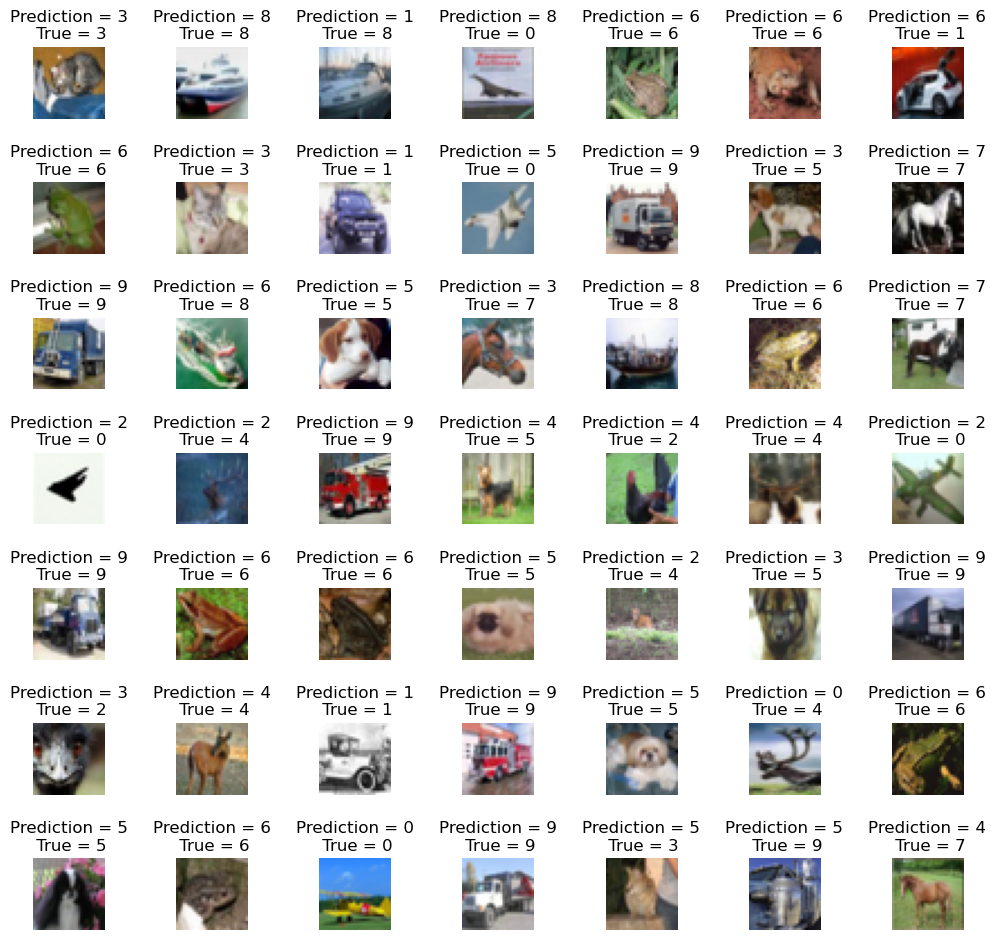

In [76]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)

<Axes: >

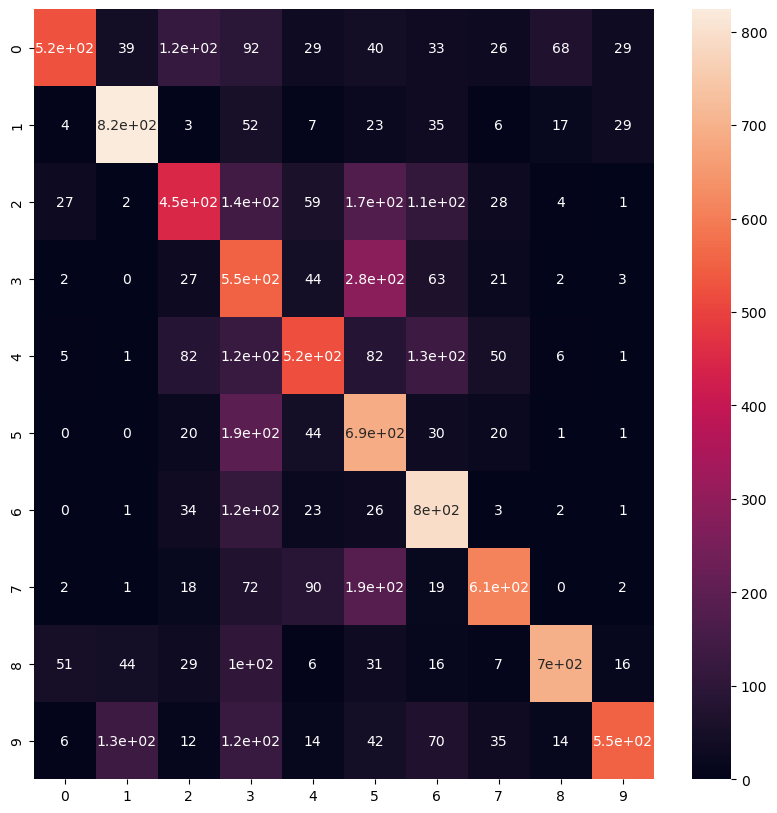

In [78]:
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [79]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# STEP 7.1: IMPROVING THE MODEL WITH DATA AUGMENTATION

In [80]:
import keras 
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [81]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [39]:
n = 8 
X_train_sample = X_train[:n]

In [40]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range = 90)
datagen_train.fit(X_train)

In [41]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in datagen_train.flow(X_train_sample, batch_size = n):
    for i in range(0,n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(toimage(x_batch[i]))
    fig.subtitle('Augmented Images (rotated 90 degrees)')
    plt.show()
    break; 

ImportError: cannot import name 'toimage' from 'scipy.misc' (C:\Users\prana\anaconda3\Lib\site-packages\scipy\misc\__init__.py)

# STEP 7.2: MODEL TRAINING USING AUGMENTED DATASET

In [82]:
datagen = ImageDataGenerator(
                             rotation_range = 90,
                             width_shift_range = 0.1,
                             horizontal_flip = True, 
                             vertical_flip = True
                                )

In [83]:
datagen.fit(X_train)

In [85]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2
   3/1563 [..............................] - ETA: 1:03 - loss: 168351573353340862464.0000 - accuracy: 0.0000e+00

C:\Users\prana\AppData\Local\Temp\ipykernel_2020\25322486.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)


1563/1563 [==============================] - 66s 42ms/step - loss: 681165151146392682496.0000 - accuracy: 0.0000e+00
Epoch 2/2
1563/1563 [==============================] - 66s 42ms/step - loss: 2962273054200428494848.0000 - accuracy: 0.0000e+00
